In [1]:
#importing libraries  

from qiskit import QuantumCircuit 
from qiskit import transpile
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService
#from qiskit.circuit.library import MCMT
from qiskit.visualization import plot_distribution
#from qiskit.circuit.library import Diagonal
#from qiskit.circuit.library import RGQFTMultiplier
#from qiskit.circuit.library import Permutation
#from qiskit.circuit.library import QFT

#import numpy as np
#import matplotlib.pyplot as plt
#from qiskit.aqua.components.uncertainty_models import NormalDistribution, UniformDistribution, LogNormalDistributio
#from qiskit_finance.circuit.library.probability_distributions import NormalDistribution, UniformDistribution,LogNormalDistribution


In [2]:
#Defining backend and sampler

backend_aer = AerSimulator()
sampler_aer = SamplerV2(backend_aer)

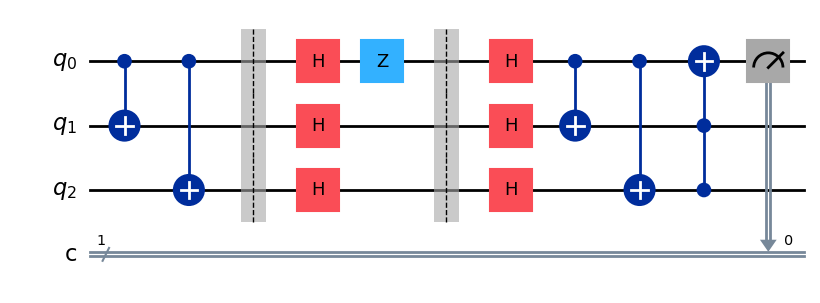

In [3]:
#we need at least three  qubits that will sofer a change in the phase due to error. Two of these qubits are just auxiliars that will correct the error

#We need just one classical bit since we want to measure just the corrected qubit

#initializing  quantum circuit
qc = QuantumCircuit(3,1)   #N = 3 qubits. N=1 classical bits
                            # we use 3 qubits: one to put the error and two aux

#building the circuit
#Apply CNOT in (q0,q1)_____> nothing happens (control = 0)

qc.cx(0,1)

#Apply CNOT in (q0, q2)____> nothing happens (control = 0)

qc.cx(0,2)


##########Now lets simulate the phase error#############

qc.barrier()


#put the qubits in superposition

qc.h(0)

qc.h(1)

qc.h(2)

#Apply a rotation on z in q0. Remember that z changes only when the qubit is equal to 1

qc.z(0)# Added to simulate a phase error


qc.barrier()


#let the qubits out of superposition

qc.h(0)

qc.h(1)

qc.h(2)

#Apply CNOT in (q0, q1)

qc.cx(0,1)

#Apply CNOT in (q0,q2)

qc.cx(0,2)

#Apply toffoli to correct q0



qc.ccx(2,1,0)

#Messure q0....it must have been corrected and the result should be q0=0

qc.measure(0,0)

#print circuit

qc.draw("mpl")
#print(circuit)


In the circuit above, the error was induce in between the barriers and the correction after.

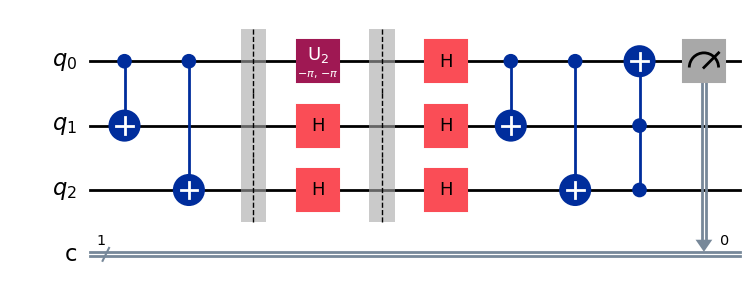

In [4]:
#Transpiling the circuit, it is needed if we want to send to a real QC

qct = transpile(qc,backend = backend_aer) 

#Drawing the trasnpiled circuit
qct.draw("mpl")



In [5]:
job_aer = sampler_aer.run([(qct, None, 1000)]) # running the transpiled circuit 1000 times

result = job_aer.result() #Getting the results   

counts = result[0].data.c.get_counts() #Meassuring results. According to the circuit we measure 'c'
#counts
print('RESULT ', counts)


RESULT  {'0': 1000}


Phase Flip Correction 1000 times
-------------



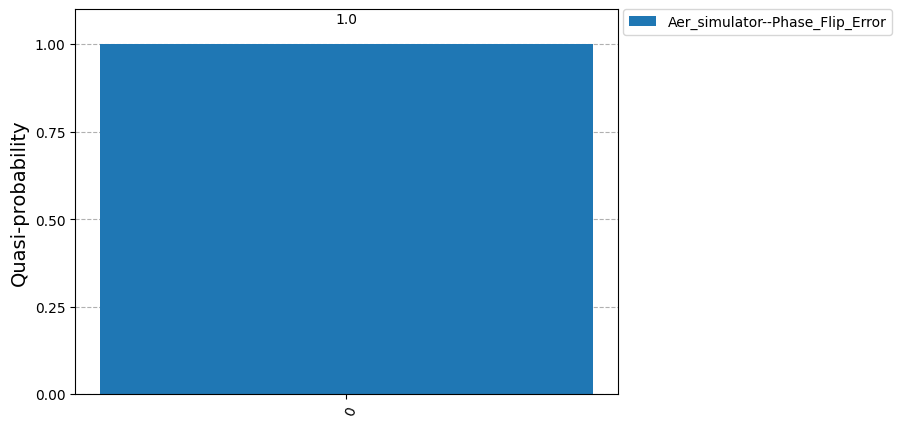

In [6]:
print('Phase Flip Correction 1000 times')
print('-------------\n')
#print(counts)

plot_distribution([counts], legend = ['Aer_simulator--Phase_Flip_Error'])


The error was corrected 1000 times